In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
def mixture_of_normals(x, params):
    y = 0
    for w, loc, scale in zip(*params):
        y += w * norm.pdf(x, loc, scale)
    return y

In [3]:
priors = {
    'spiky': [(0.4, 0.2, 0.2, 0.2), (0, 0, 0, 0), (0.25, 0.5, 1, 2)],
    'near-normal': [(2 / 3, 1 / 3), (0, 0), (1, 2)],
    'flat-top': [[1 / 7] * 7, np.linspace(-1.5, 1.5, 7), [0.5] * 7],
    'big-normal': [(1,), (0,), (4,)],
    'bimodal': [(0.5, 0.5), (-2, 2), (1, 1)],
}

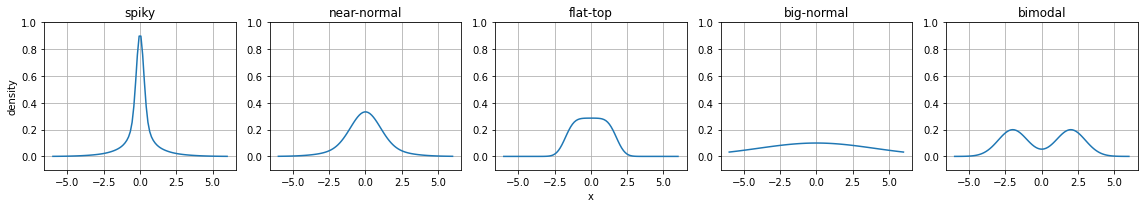

In [4]:
x = np.linspace(-6, 6, 100)
fig, axes = plt.subplots(1, 5, figsize=(16, 3))
for ax, (name, params) in zip(axes, priors.items()):
    y = mixture_of_normals(x, params)
    ax.plot(x, y)
    ax.set_title(name)
    ax.set_ylim([-0.1, 1])
    ax.grid()
axes[0].set_ylabel('density')
axes[2].set_xlabel('x')
fig.tight_layout()
fig.savefig('alternative_dist.pdf')

In [5]:
df = pd.read_csv('result.csv')

In [6]:
df

,method,prior,nsample,pi0,pi0_est,rrmse
0,VL+ash,spiky,2,0.192992,0.049364,1.000000
1,VL+eBayes+ash,spiky,2,0.192992,0.198267,0.848565
2,VL+eBayes+ash.alpha=1,spiky,2,0.192992,0.188545,0.863660
3,VL+pval2se+ash,spiky,2,0.192992,0.241838,0.984896
4,VL+ash,spiky,2,0.524920,0.098951,1.000000
...,...,...,...,...,...,...
2995,VL+pval2se+ash,bimodal,10,0.366786,0.372088,1.034890
2996,VL+ash,bimodal,10,0.743698,0.631239,1.000000
2997,VL+eBayes+ash,bimodal,10,0.743698,0.743902,0.983534
2998,VL+eBayes+ash.alpha=1,bimodal,10,0.743698,0.762082,1.006734


In [7]:
from itertools import cycle
cycol = cycle('bgrcmk')

In [8]:
methods = df.method.unique()
priors = df.prior.unique()
n_samples = df.nsample.unique()
colors = {method: next(cycol) for method in methods}
nrows = len(n_samples)
ncols = len(priors)

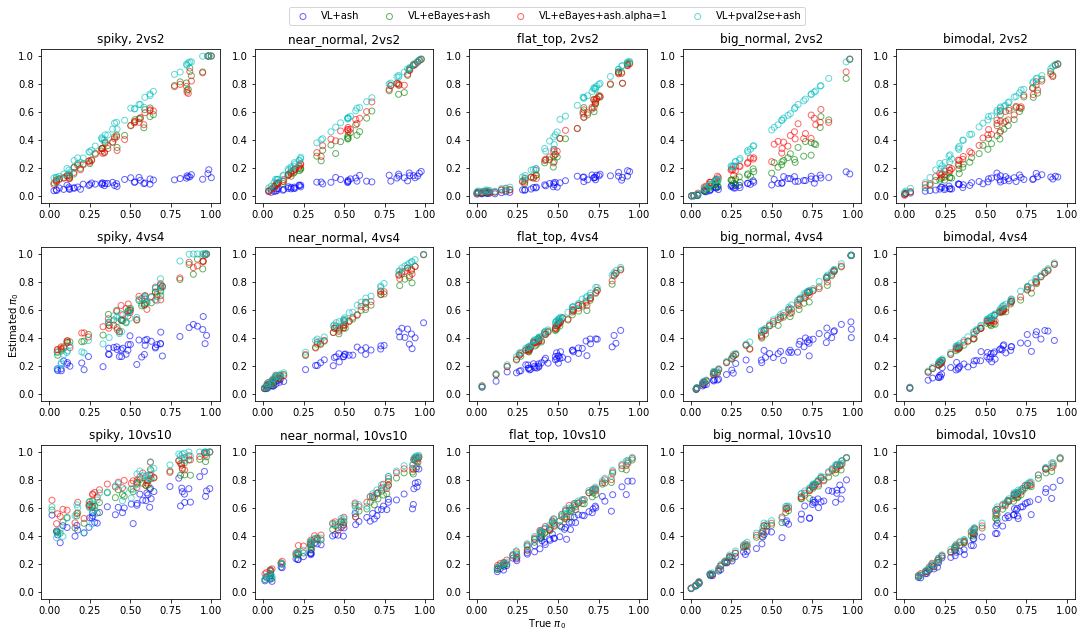

In [9]:
fig, axes = plt.subplots(nrows, ncols, figsize=(3 * ncols, 2.8 * nrows))
for i, nsample in enumerate(n_samples):
    for j, prior in enumerate(priors):
        df_subset = df[(df.nsample == nsample) & (df.prior == prior)]
        for method in methods:
            df_m = df_subset[df_subset.method == method]
            axes[i, j].scatter(
                df_m.pi0,
                df_m.pi0_est,
                facecolors='none',
                edgecolors=colors[method],
                label=method,
                alpha=0.6,
            )
        axes[i, j].set_xlim(-0.05, 1.05)
        axes[i, j].set_ylim(-0.05, 1.05)
        axes[i, j].set_title(f'{prior}, {nsample}vs{nsample}')
legend = fig.legend(
    *axes[0, 0].get_legend_handles_labels(),
    ncol=len(methods),
    bbox_to_anchor=(0.5, 1.01),
    loc='center',
)
xlabel = fig.text(0.5, 0, r'True $\pi_0$', ha='center')
ylabel = fig.text(0, 0.5, r'Estimated $\pi_0$', va='center', rotation='vertical')
fig.tight_layout()
fig.savefig(
   'pi0_est.pdf', bbox_extra_artists=(legend, xlabel, ylabel), bbox_inches='tight'
)

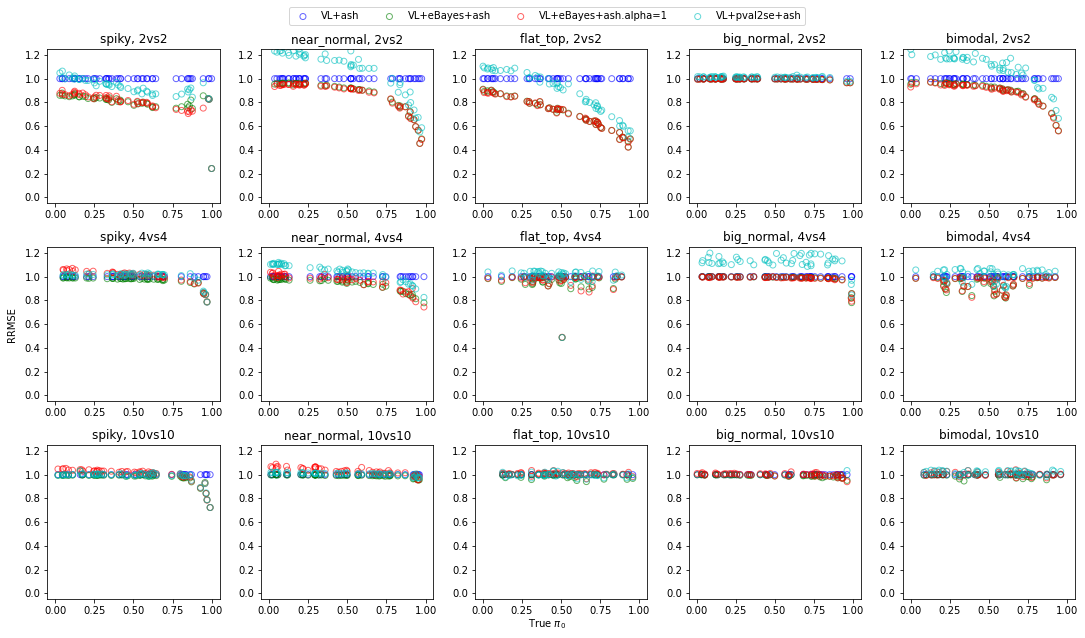

In [10]:
fig, axes = plt.subplots(nrows, ncols, figsize=(3 * ncols, 2.8 * nrows))
for i, nsample in enumerate(n_samples):
    for j, prior in enumerate(priors):
        df_subset = df[(df.nsample == nsample) & (df.prior == prior)]
        for method in methods:
            df_m = df_subset[df_subset.method == method]
            axes[i, j].scatter(
                df_m.pi0,
                df_m.rrmse,
                facecolors='none',
                edgecolors=colors[method],
                label=method,
                alpha=0.6,
            )
        axes[i, j].set_xlim(-0.05, 1.05)
        axes[i, j].set_ylim(-0.05, 1.25)
        axes[i, j].set_title(f'{prior}, {nsample}vs{nsample}')
legend = fig.legend(
    *axes[0, 0].get_legend_handles_labels(),
    ncol=len(methods),
    bbox_to_anchor=(0.5, 1.01),
    loc='center',
)
xlabel = fig.text(0.5, 0, r'True $\pi_0$', ha='center')
ylabel = fig.text(0, 0.5, 'RRMSE', va='center', rotation='vertical')
fig.tight_layout()
fig.savefig(
    'rrmse.pdf', bbox_extra_artists=(legend, xlabel, ylabel), bbox_inches='tight'
)